In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
data=pd.read_csv(r"C:\Etc_mentor_Project\dataset\Crop_recommendation (1).csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [50]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [51]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
data.label=le.fit_transform(data.label)

<Axes: >

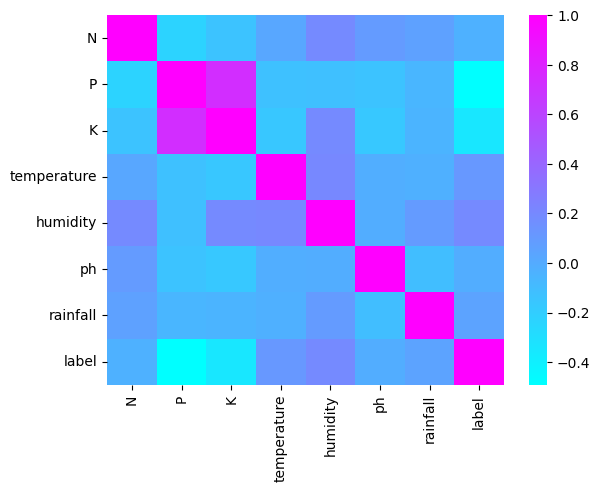

In [60]:
c=data.corr()
sns.heatmap(c,cmap="cool")

In [13]:
ip=data.drop("label",axis=1)
op=data.label

In [14]:
ip.shape

(2200, 7)

In [15]:
op.shape

(2200,)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)
x_train

,N,P,K,temperature,humidity,ph,rainfall
1847,7,15,32,25.035124,95.897400,6.182233,174.796583
285,37,78,79,19.952648,14.826331,7.786366,88.681031
1722,61,64,52,43.302049,92.834054,6.641099,110.562229
1387,91,24,55,26.270616,83.091945,6.259087,46.768375
1651,1,15,9,29.983647,94.552397,7.533509,115.356032
...,...,...,...,...,...,...,...
678,27,56,20,29.211422,87.114978,6.418743,51.538482
2176,86,40,33,26.138787,52.263117,7.432322,136.302777
503,4,43,18,29.029553,61.093875,8.840656,72.980166
945,9,25,41,24.815301,91.908430,5.972715,109.285342


In [31]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred=dc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.9863636363636363


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred1=rf.predict(x_test)
accuracy_score(pred1,y_test)

0.9931818181818182

In [29]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred2=xgb.predict(x_test)
accuracy_score(pred2,y_test)

0.9886363636363636

In [33]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(rf,f)

In [34]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
348,34,60,23,20.125741,24.969699,5.659255,100.049718
1049,119,90,48,28.667251,79.592425,5.986442,118.258344
2008,67,55,44,26.284017,75.146402,7.251847,182.268545
57,91,36,45,24.443455,82.454326,5.950648,267.976195
173,94,50,19,23.303553,73.625484,5.873242,97.590813
...,...,...,...,...,...,...,...
479,13,67,18,30.575304,34.755912,5.384763,177.576430
1201,13,144,204,30.728040,82.426141,6.092242,68.381355
49,88,55,45,24.635449,80.413630,7.730368,253.720278
773,56,76,16,28.272659,61.189562,7.513151,63.299008


In [42]:
res=rf.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
print(le.inverse_transform(res))

['rice']


In [44]:
with open("encoder.pkl","wb") as f:
    pickle.dump(le,f)

In [46]:
data.rainfall.describe()

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64